In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/ParisHousingClass.csv')
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


## EDA

In [4]:
df.shape

(10000, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [6]:
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [7]:
df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.category.value_counts()

Basic     8735
Luxury    1265
Name: category, dtype: int64

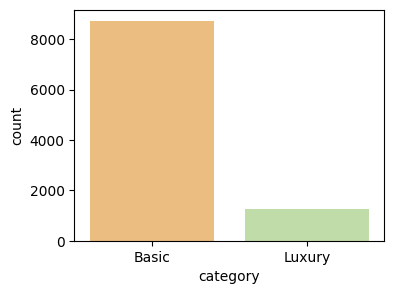

In [10]:
fig = plt.figure(figsize=(4, 3))
sns.countplot(x='category', data=df, palette='Spectral')
plt.show()

**category** is not balanced

### Undersampling

In [11]:
basic_count = df['category'].value_counts()['Basic']
luxury_count = df['category'].value_counts()['Luxury']

In [12]:
if basic_count > luxury_count:
    df = df.drop(df[df['category'] == 'Basic'].tail(basic_count - luxury_count).index)

In [13]:
df['category'].value_counts()

Basic     1265
Luxury    1265
Name: category, dtype: int64

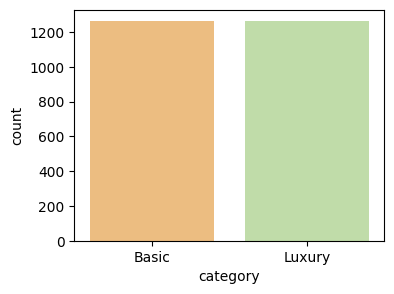

In [14]:
df.shape
fig = plt.figure(figsize=(4, 3))
sns.countplot(x='category', data=df, palette='Spectral')
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['category'] = le.fit_transform(df['category'])
df['category'].value_counts()

0    1265
1    1265
Name: category, dtype: int64

- 0 -> Basic
- 1 -> Luxury

### Correlation Matrix

<Axes: >

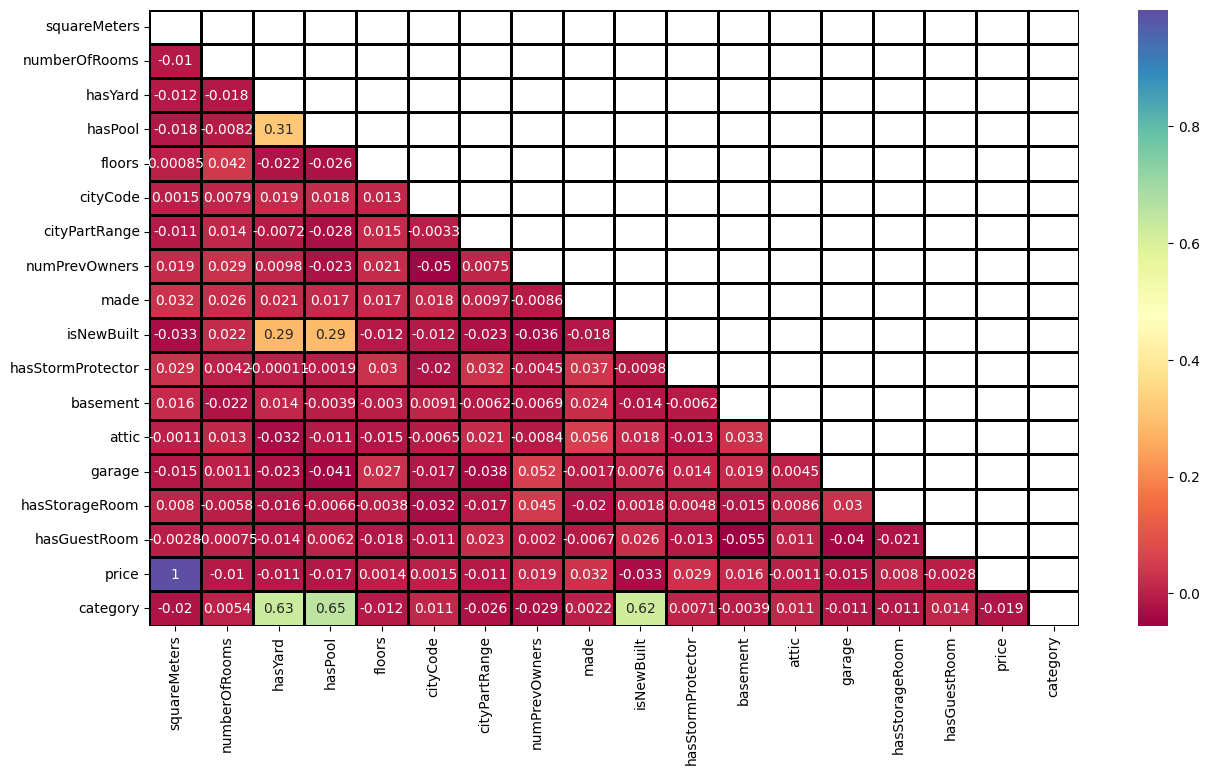

In [16]:
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, mask=mask, cbar = True,annot = True, cmap='Spectral', linewidths=1, linecolor='black')

Discovered some powerful features which are 'hasYard', 'hasPool', and 'isNewBuilt'.

### Plot Target Features (Category)

In [17]:
def create_countplot(df, x_variable, hue_variable):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[x_variable], hue=df[hue_variable], palette="Spectral")
    plt.title(f'Countplot for {x_variable} with {hue_variable}')
    plt.show()

In [18]:
columns = ['hasYard', 'hasPool', 'cityPartRange', 'numPrevOwners',
           'isNewBuilt', 'cityPartRange', 'hasStormProtector',
           'hasStorageRoom', 'hasGuestRoom']
hue_variable = 'category'

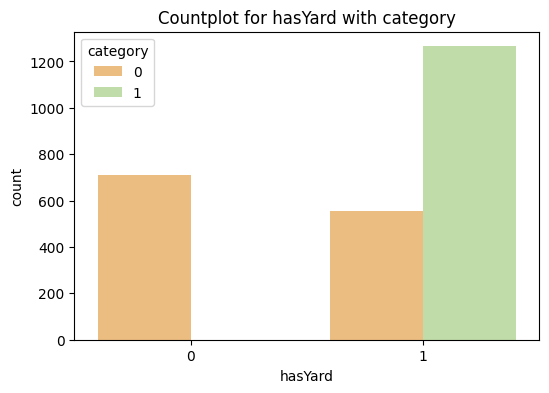

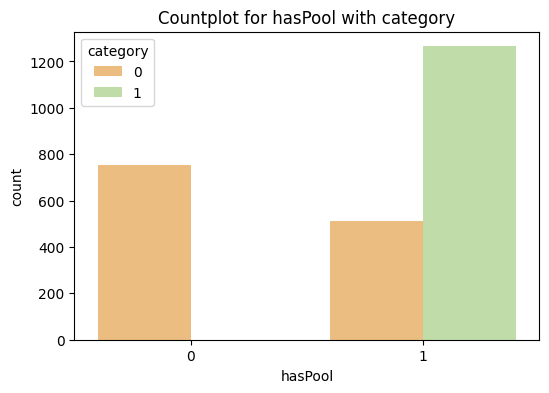

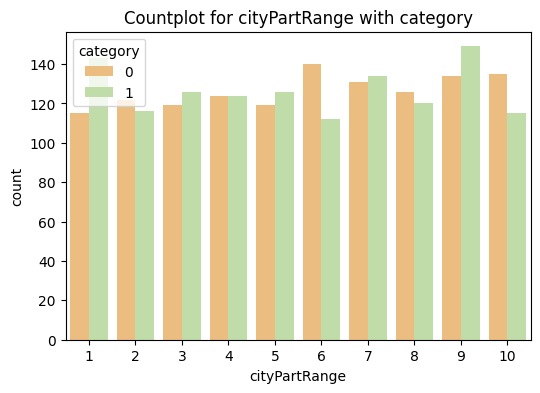

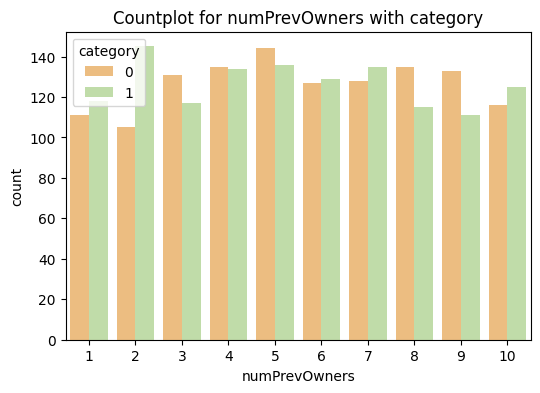

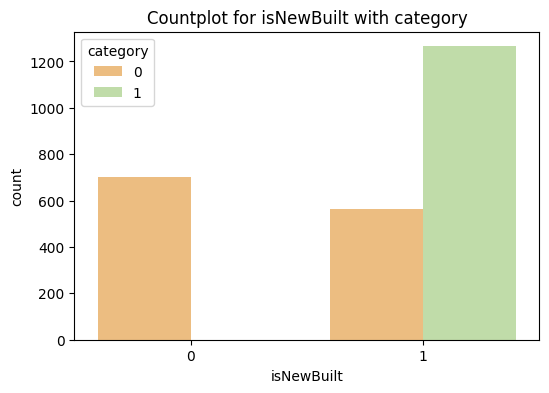

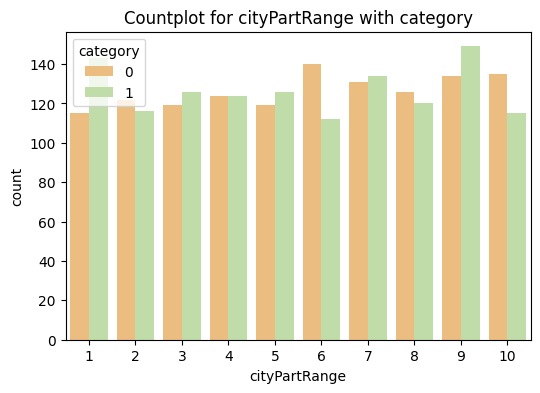

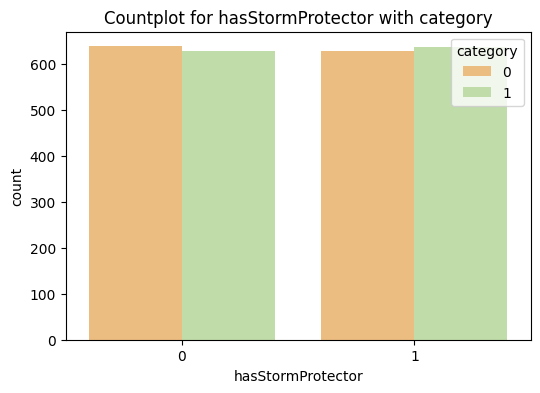

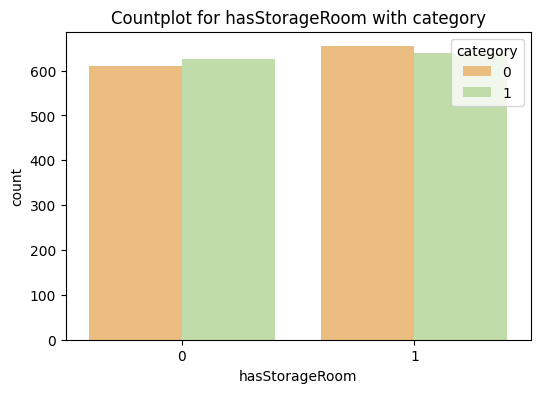

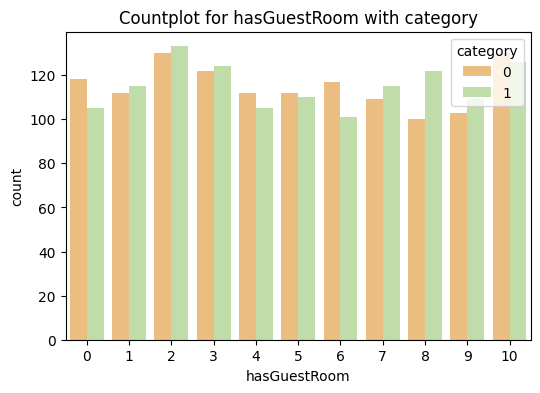

In [19]:
for column in columns:
    create_countplot(df, column, hue_variable)

-  A house that has a yard, a pool, and is newly built is definitely **luxury**.
- other features don't really make a difference.

### Plot Continuous Features

In [20]:
def create_continuous_plot(df, feature):
    plt.figure(figsize=(6, 4))

    # Histogram
    sns.histplot(df, x=feature, kde=True, hue='category', multiple='stack', palette='Spectral')
    plt.title(f'Histogram for {feature}')

    plt.show()

In [21]:
cont_features = ['squareMeters', 'numberOfRooms', 'floors',
                 'made', 'basement', 'attic', 'garage', 'price']
hue_variable = 'category'

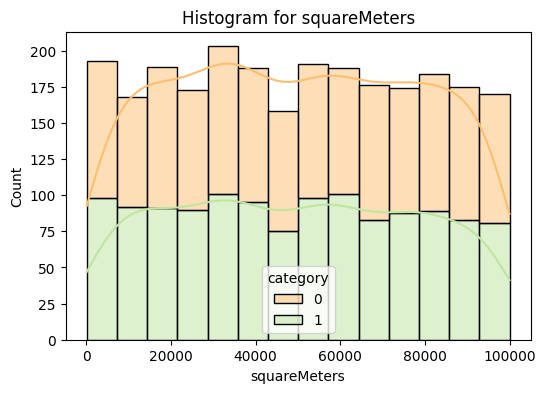

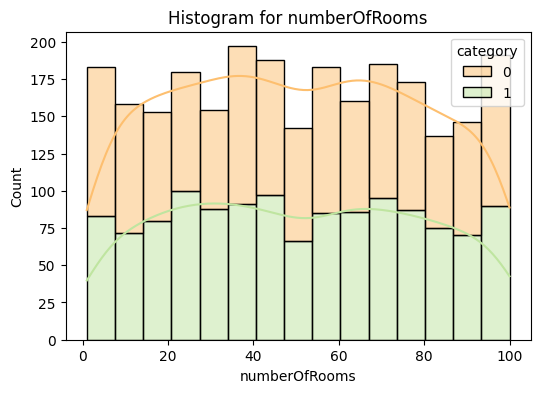

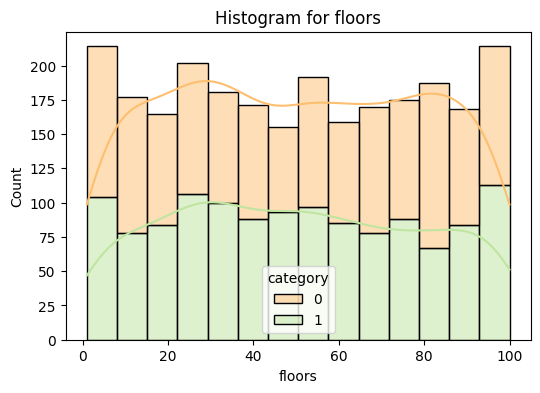

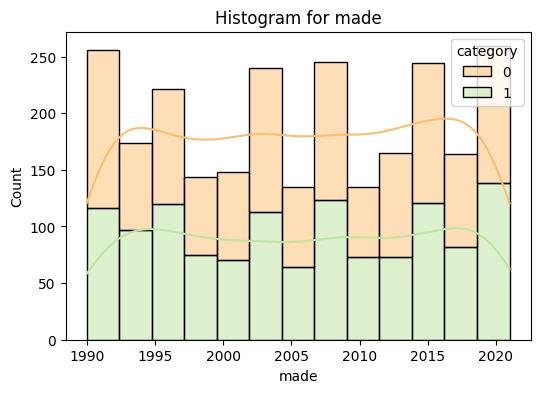

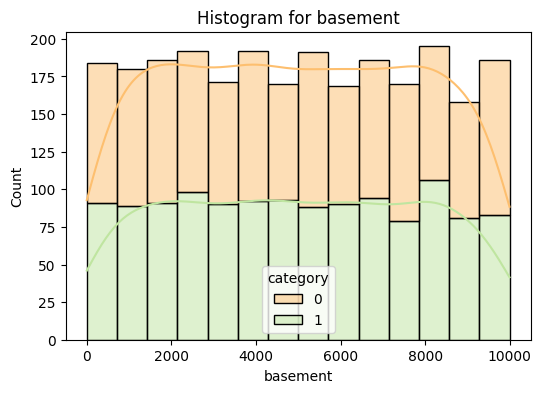

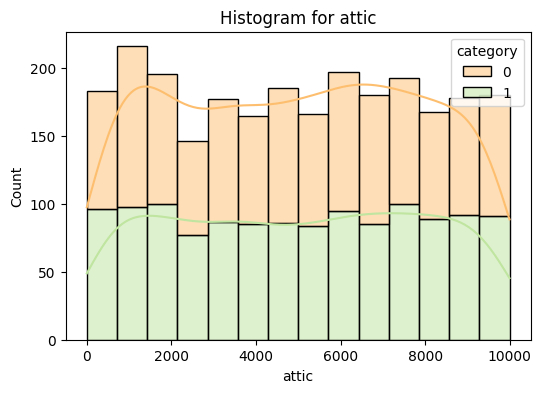

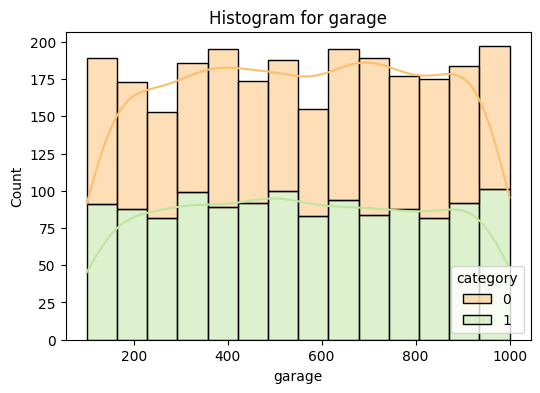

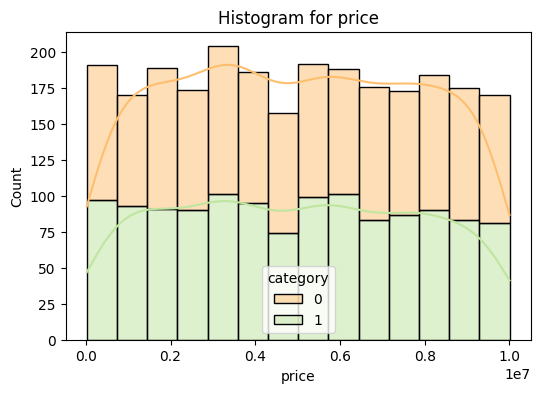

In [22]:
for cont_feature in cont_features:
    create_continuous_plot(df, cont_feature)

The distribution for luxury and basic is not too different.

## Preprocessing

### Scalling Data

In [23]:
y = df["category"]
X = df.drop('category', axis = 1)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Splitting Data

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Model

## 1. Support Vector Machines (SVM)

In [26]:
from sklearn.svm import SVC
svm = SVC()

In [27]:
svm.fit(x_train, y_train)

SVC()

In [28]:
svm.score(x_test, y_test)

1.0

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score

In [30]:
svm_predictions = svm.predict(x_test)

In [31]:
svm_confusion_mat = confusion_matrix(y_test, svm_predictions)
print("Confusion Matrix:")
print(svm_confusion_mat)

Confusion Matrix:
[[249   0]
 [  0 257]]


In [32]:
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
print("Akurasi:", svm_accuracy)
print("Presisi:", svm_precision)
print("Recall:", svm_recall)

Akurasi: 1.0
Presisi: 1.0
Recall: 1.0


In [33]:
svm_class_report = classification_report(y_test, svm_predictions)
print("Classification Report:")
print(svm_class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       257

    accuracy                           1.00       506
   macro avg       1.00      1.00      1.00       506
weighted avg       1.00      1.00      1.00       506



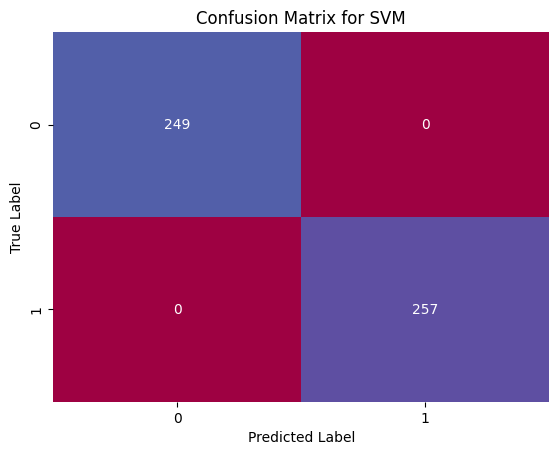

In [34]:
sns.heatmap(svm_confusion_mat, annot=True, fmt='d', cmap='Spectral', cbar=False)
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 2. Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [36]:
lg.fit(x_train, y_train)

LogisticRegression()

In [37]:
lg.score(x_test, y_test)

1.0

In [38]:
lg_predictions = lg.predict(x_test)

In [39]:
lg_confusion_mat = confusion_matrix(y_test, lg_predictions)
print("Confusion Matrix:")
print(lg_confusion_mat)

Confusion Matrix:
[[249   0]
 [  0 257]]


In [40]:
lg_accuracy = accuracy_score(y_test, lg_predictions)
lg_precision = precision_score(y_test, lg_predictions)
lg_recall = recall_score(y_test, lg_predictions)
print("Akurasi:", lg_accuracy)
print("Presisi:", lg_precision)
print("Recall:", lg_recall)

Akurasi: 1.0
Presisi: 1.0
Recall: 1.0


In [41]:
lg_class_report = classification_report(y_test, lg_predictions)
print("Classification Report:")
print(lg_class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       257

    accuracy                           1.00       506
   macro avg       1.00      1.00      1.00       506
weighted avg       1.00      1.00      1.00       506



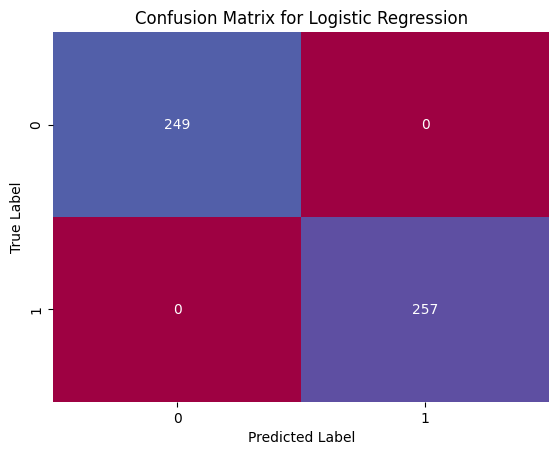

In [42]:
sns.heatmap(lg_confusion_mat, annot=True, fmt='d', cmap='Spectral', cbar=False)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 3. Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [44]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [45]:
rfc.score(x_test, y_test)

1.0

In [46]:
rfc_predictions = rfc.predict(x_test)

In [47]:
rfc_confusion_mat = confusion_matrix(y_test, rfc_predictions)
print("Confusion Matrix:")
print(rfc_confusion_mat)

Confusion Matrix:
[[249   0]
 [  0 257]]


In [48]:
rfc_accuracy = accuracy_score(y_test, rfc_predictions)
rfc_precision = precision_score(y_test, rfc_predictions)
rfc_recall = recall_score(y_test, rfc_predictions)
print("Akurasi:", rfc_accuracy)
print("Presisi:", rfc_precision)
print("Recall:", rfc_recall)

Akurasi: 1.0
Presisi: 1.0
Recall: 1.0


In [49]:
rfc_class_report = classification_report(y_test, rfc_predictions)
print("Classification Report:")
print(rfc_class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       257

    accuracy                           1.00       506
   macro avg       1.00      1.00      1.00       506
weighted avg       1.00      1.00      1.00       506



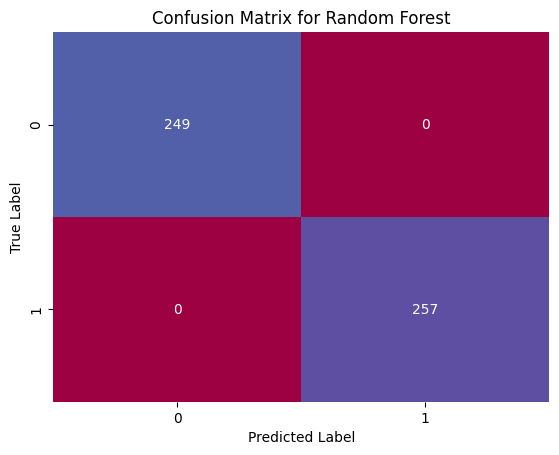

In [50]:
sns.heatmap(rfc_confusion_mat, annot=True, fmt='d', cmap='Spectral', cbar=False)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 4. Gradient Boosting

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [52]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [53]:
gbc.score(x_test, y_test)

1.0

In [54]:
gbc_predictions = gbc.predict(x_test)

In [55]:
gbc_confusion_mat = confusion_matrix(y_test, gbc_predictions)
print("Confusion Matrix:")
print(gbc_confusion_mat)

Confusion Matrix:
[[249   0]
 [  0 257]]


In [56]:
gbc_accuracy = accuracy_score(y_test, gbc_predictions)
gbc_precision = precision_score(y_test, gbc_predictions)
gbc_recall = recall_score(y_test, gbc_predictions)
print("Akurasi:", gbc_accuracy)
print("Presisi:", gbc_precision)
print("Recall:", gbc_recall)

Akurasi: 1.0
Presisi: 1.0
Recall: 1.0


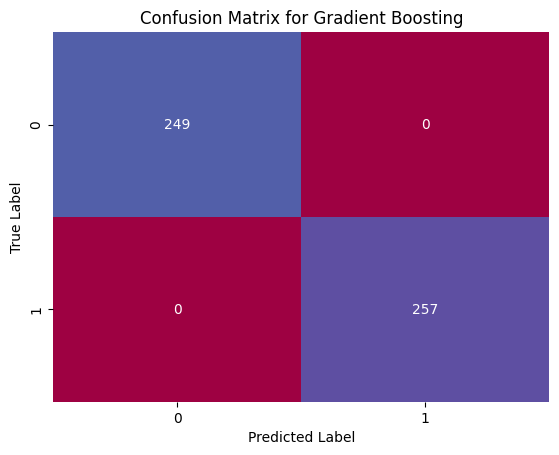

In [57]:
sns.heatmap(gbc_confusion_mat, annot=True, fmt='d', cmap='Spectral', cbar=False)
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 5. K-Nearest Neighbors

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [59]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [60]:
knn.score(x_test, y_test)

0.9407114624505929

In [61]:
knn_predictions = knn.predict(x_test)

In [62]:
knn_confusion_mat = confusion_matrix(y_test, knn_predictions)
print("Confusion Matrix:")
print(knn_confusion_mat)

Confusion Matrix:
[[219  30]
 [  0 257]]


In [63]:
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
print("Akurasi:", knn_accuracy)
print("Presisi:", knn_precision)
print("Recall:", knn_recall)

Akurasi: 0.9407114624505929
Presisi: 0.8954703832752613
Recall: 1.0


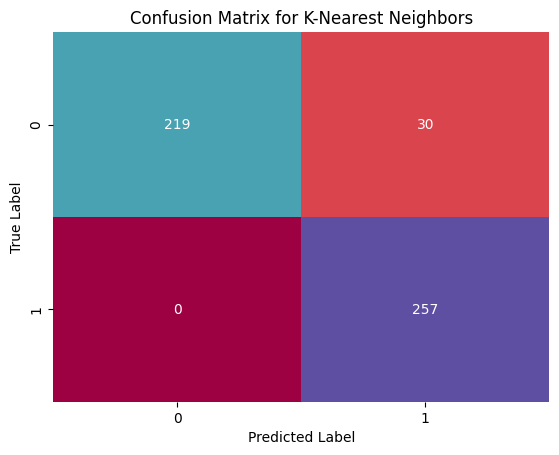

In [64]:
sns.heatmap(knn_confusion_mat, annot=True, fmt='d', cmap='Spectral', cbar=False)
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 6. Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtc = DecisionTreeClassifier()

In [66]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [67]:
dtc.score(x_test, y_test)

1.0

In [68]:
dtc_predictions = dtc.predict(x_test)

In [69]:
dtc_confusion_mat = confusion_matrix(y_test, dtc_predictions)
print("Confusion Matrix:")
print(dtc_confusion_mat)

Confusion Matrix:
[[249   0]
 [  0 257]]


In [70]:
dtc_accuracy = accuracy_score(y_test, dtc_predictions)
dtc_precision = precision_score(y_test, dtc_predictions)
dtc_recall = recall_score(y_test, dtc_predictions)
print("Akurasi:", dtc_accuracy)
print("Presisi:", dtc_precision)
print("Recall:", dtc_recall)

Akurasi: 1.0
Presisi: 1.0
Recall: 1.0


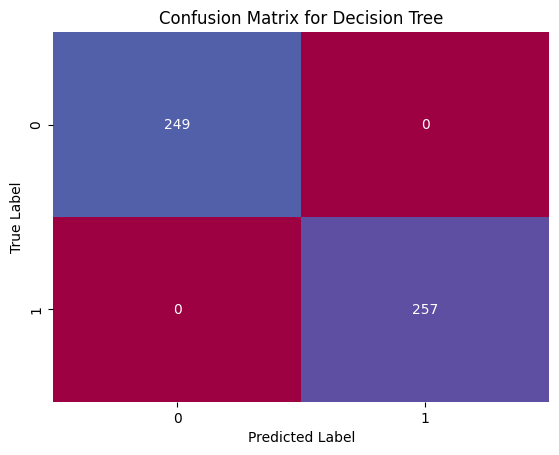

In [71]:
sns.heatmap(dtc_confusion_mat, annot=True, fmt='d', cmap='Spectral', cbar=False)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [72]:
feature_names = ['squareMeters','numberOfRooms','hasYard','hasPool',
                 'floors','cityCode','cityPartRange','numPrevOwners',
                 'made','isNewBuilt','hasStormProtector','basement',
                 'attic','garage','hasStorageRoom','hasGuestRoom']
class_names = ['Basic','Luxury']

[Text(0.3333333333333333, 0.875, 'hasPool <= -0.441\ngini = 0.5\nsamples = 2024\nvalue = [1016, 1008]\nclass = Basic'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 604\nvalue = [604, 0]\nclass = Basic'),
 Text(0.5, 0.625, 'isNewBuilt <= -0.497\ngini = 0.412\nsamples = 1420\nvalue = [412, 1008]\nclass = Luxury'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 279\nvalue = [279, 0]\nclass = Basic'),
 Text(0.6666666666666666, 0.375, 'hasYard <= -0.487\ngini = 0.206\nsamples = 1141\nvalue = [133, 1008]\nclass = Luxury'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 133\nvalue = [133, 0]\nclass = Basic'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 1008\nvalue = [0, 1008]\nclass = Luxury')]

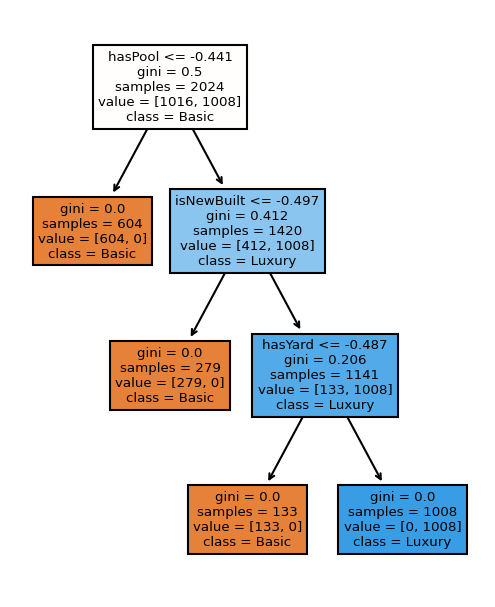

In [73]:
plt.figure(figsize=(4, 5), dpi=150)
plot_tree(dtc, filled=True,
          feature_names = feature_names,
          class_names=class_names)

## 7. Naive Bayes

In [74]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [75]:
gnb.fit(x_train, y_train)

GaussianNB()

In [76]:
gnb.score(x_test, y_test)

1.0

In [77]:
gnb_predictions = gnb.predict(x_test)

In [78]:
gnb_confusion_mat = confusion_matrix(y_test, gnb_predictions)
print("Confusion Matrix:")
print(gnb_confusion_mat)

Confusion Matrix:
[[249   0]
 [  0 257]]


In [79]:
gnb_accuracy = accuracy_score(y_test, gnb_predictions)
gnb_precision = precision_score(y_test, gnb_predictions)
gnb_recall = recall_score(y_test, gnb_predictions)
print("Akurasi:", gnb_accuracy)
print("Presisi:", gnb_precision)
print("Recall:", gnb_recall)

Akurasi: 1.0
Presisi: 1.0
Recall: 1.0


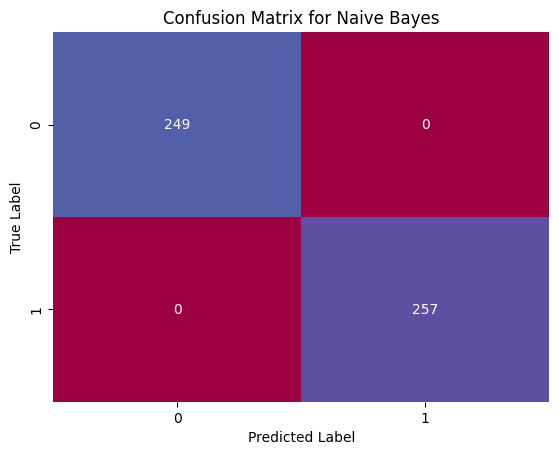

In [80]:
sns.heatmap(gnb_confusion_mat, annot=True, fmt='d', cmap='Spectral', cbar=False)
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Conclusion

Semua algoritma menunjukkan tingkat akurasi 100%, kecuali K-Nearest Neighbors dengan akurasi 94,07%.